In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv('train.csv', parse_dates=['date'])

# Display the first few rows
print(df.head())


   id        date  store_nbr      family  sales  onpromotion
0   0  2013-01-01        1.0  AUTOMOTIVE    0.0          0.0
1   1  2013-01-01        1.0   BABY CARE    0.0          0.0
2   2  2013-01-01        1.0      BEAUTY    0.0          0.0
3   3  2013-01-01        1.0   BEVERAGES    0.0          0.0
4   4  2013-01-01        1.0       BOOKS    0.0          0.0


In [ ]:
# Aggregate sales by date
daily_sales = df.groupby('date')['sales'].sum().reset_index()

# Sort by date
daily_sales = daily_sales.sort_values('date')

# Display the first few rows
print(daily_sales.head())


         date          sales
0  2013-01-01    2511.618999
1  2013-01-02  496092.417944
2  2013-01-03  361461.231124
3  2013-01-04  354459.677093
4  2013-01-05  477350.121229


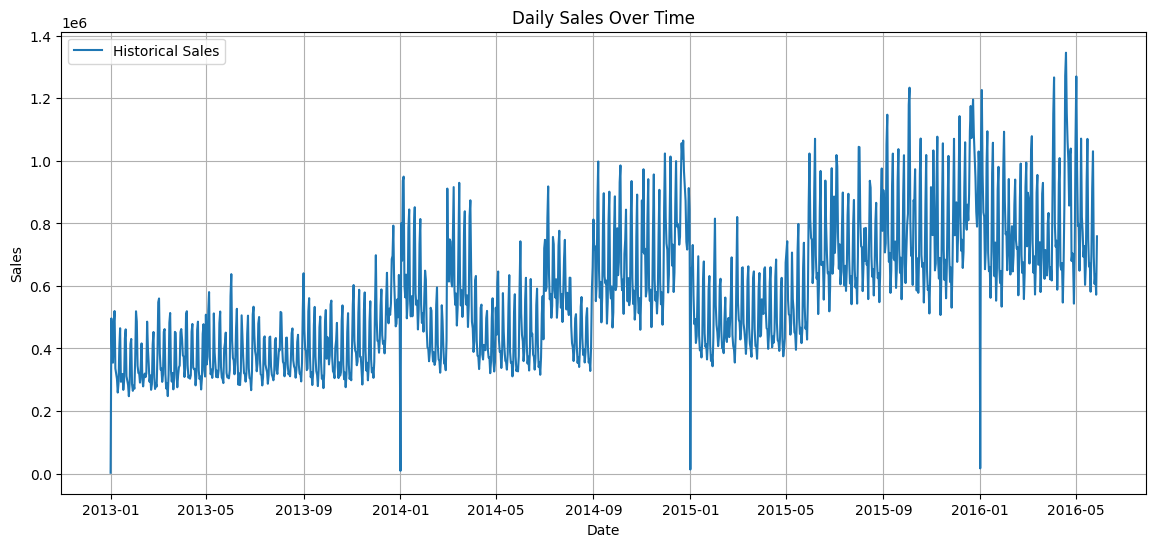

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Historical Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Daily Sales Over Time')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np

# Convert dates to ordinal
daily_sales['date_ordinal'] = daily_sales['date'].map(pd.Timestamp.toordinal)

# Features and target
X = daily_sales[['date_ordinal']]
y = daily_sales['sales']

# Train the model
model = LinearRegression()
model.fit(X, y)


ValueError: time data "2014-" doesn't match format "%Y-%m-%d", at position 364. You might want to try:
    - passing `format` if your strings have a consistent format;
    - passing `format='ISO8601'` if your strings are all ISO8601 but not necessarily in exactly the same format;
    - passing `format='mixed'`, and the format will be inferred for each element individually. You might want to use `dayfirst` alongside this.

In [ ]:
# Generate future dates
last_date = daily_sales['date'].max()
future_dates = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Convert future dates to ordinal
future_dates_ordinal = future_dates.map(pd.Timestamp.toordinal).values.reshape(-1, 1)

# Predict future sales
future_sales = model.predict(future_dates_ordinal)

# Create a DataFrame for future predictions
future_df = pd.DataFrame({
    'date': future_dates,
    'predicted_sales': future_sales
})


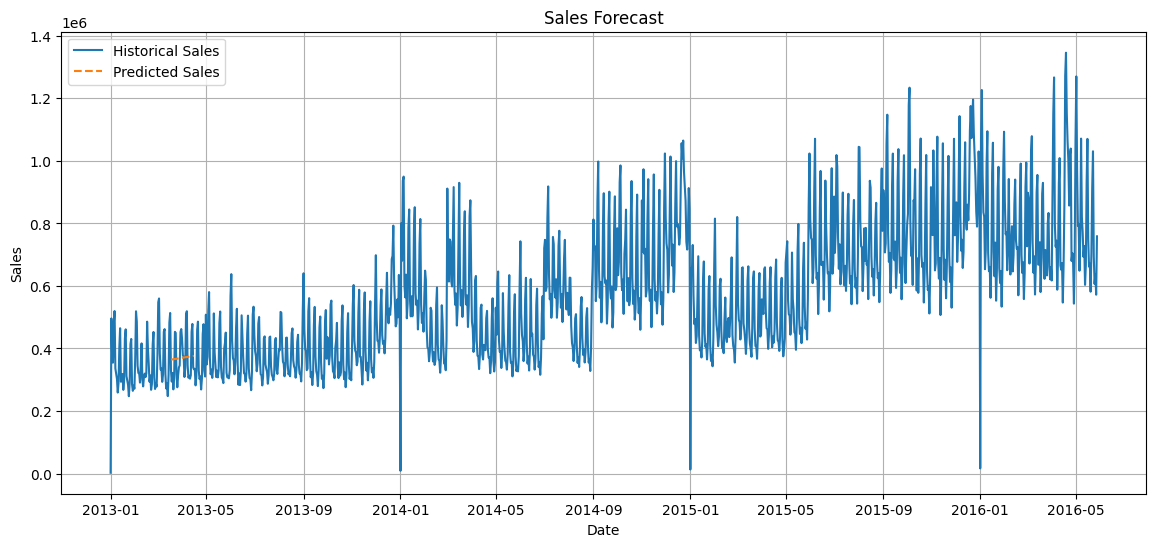

In [ ]:
plt.figure(figsize=(14, 6))
plt.plot(daily_sales['date'], daily_sales['sales'], label='Historical Sales')
plt.plot(future_df['date'], future_df['predicted_sales'], label='Predicted Sales', linestyle='--')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Sales Forecast')
plt.legend()
plt.grid(True)
plt.show()
